<a href="https://colab.research.google.com/github/vedaant-arora/SIH/blob/main/Backend%20ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'DayOfWeek' feature
df['DayOfWeek'] = df['Date'].dt.dayofweek

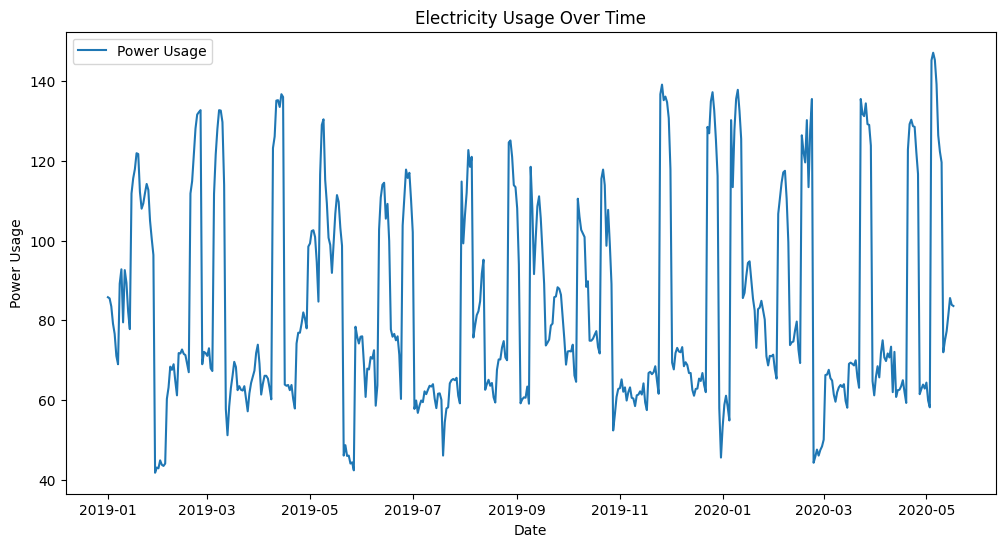

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Consumption'], label='Power Usage')
plt.title('Electricity Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Power Usage')
plt.legend()
plt.show()

In [ ]:
# Prepare features and target
X = df[['Temperature', 'Holiday', 'DayOfWeek']]
y = df['Consumption']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 822.9719276732675


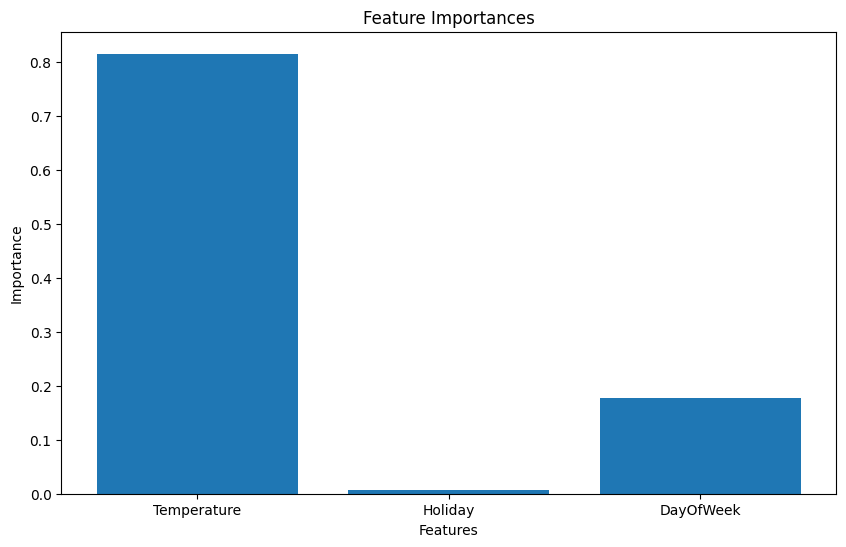

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

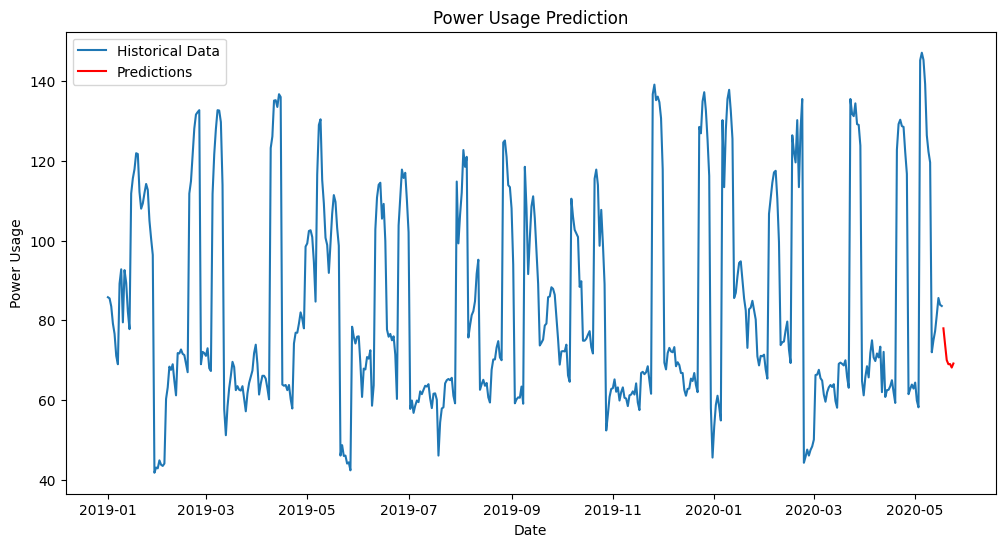

In [ ]:
# Generate future dates (next 7 days)
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Create future data (you might want to adjust these values based on real forecasts)
future_data = pd.DataFrame({
    'Date': future_dates,
    'Temperature': [25] * 7,  # Assuming constant temperature
    'Holiday': [0] * 7,  # Assuming no holidays
    'DayOfWeek': future_dates.dayofweek
})

# Make predictions
future_predictions = model.predict(future_data[['Temperature', 'Holiday', 'DayOfWeek']])

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Consumption'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Predictions', color='red')
plt.title('Power Usage Prediction')
plt.xlabel('Date')
plt.ylabel('Power Usage')
plt.legend()
plt.show()

In [ ]:
from flask import Flask, jsonify
from flask_cors import CORS
import pandas as pd
import joblib

app = Flask(__name__)
CORS(app)  # Enable CORS for all routes

@app.route('/predict', methods=['GET'])
def predict():
    # Load your trained ML model
    model = joblib.load('electricity_model.joblib')

    # Load the dataset
    df = pd.read_csv('dataset.csv', header=None, skiprows=1)
    df.columns = ['Date', 'Consumption', 'Temperature', 'Holiday']

    # Preprocess the data
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month

    # Prepare features for prediction
    X = df[['Temperature', 'Holiday', 'Month']]

    # Generate predictions using your model
    predictions = model.predict(X)

    # Prepare the data for the graph
    graph_data = {
        'labels': df['Date'].astype(str).tolist(),  # X-axis labels (dates)
        'data': predictions.tolist()  # Y-axis data (predicted values)
    }

    return jsonify(graph_data)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!pip install flask_cors

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.3414 - val_loss: 0.1048
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0991 - val_loss: 0.0681
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0763 - val_loss: 0.0716
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0670 - val_loss: 0.0654
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0635 - val_loss: 0.0640
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0658 - val_loss: 0.0713
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0729 - val_loss: 0.0644
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0563 - val_loss: 0.0660
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0569 - val_loss: 0.0662
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0602 - val_loss: 0.0624
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0608 - val_loss: 0.0647
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0

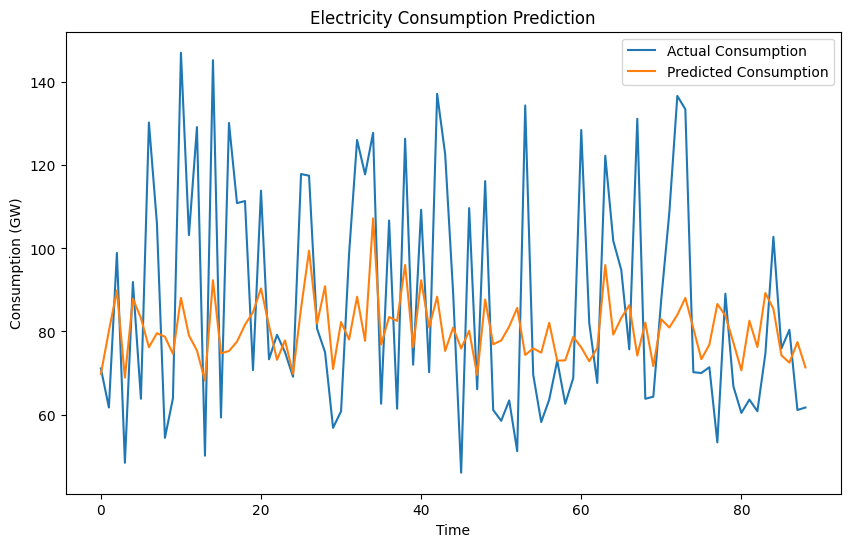

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Consumption', 'Temperature']] = scaler.fit_transform(data[['Consumption', 'Temperature']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


# Predict using the test data
predictions = model.predict(X_test)

# Create a dummy array to hold the predictions for inverse transform
# This is needed because the scaler was fit on a 2D array
predictions_dummy = np.zeros((predictions.shape[0], 2))
predictions_dummy[:,0] = predictions.flatten()  # Put predictions in the first column

# Inverse transform the predictions
predictions_inverse = scaler.inverse_transform(predictions_dummy)

# Extract the actual consumption predictions from the inverse transformed array
predictions = predictions_inverse[:, 0]

# Inverse transform the actual data to get actual values
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to a column vector
y_test_dummy = np.zeros((y_test_reshaped.shape[0], 2))  # Create a dummy array of the correct shape
y_test_dummy[:, 0] = y_test_reshaped.flatten()  # Put the y_test data in the first column
y_test_inverse = scaler.inverse_transform(y_test_dummy)  # Inverse transform
y_test = y_test_inverse[:, 0]  # Extract the actual values

# Plot predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Consumption')
plt.plot(predictions, label='Predicted Consumption')
plt.title('Electricity Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Consumption (GW)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Consumption', 'Temperature']] = scaler.fit_transform(data[['Consumption', 'Temperature']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Get user input for prediction dates
start_date = input("Enter the start date for prediction (YYYY-MM-DD): ")
end_date = input("Enter the end date for prediction (YYYY-MM-DD): ")

# Create a new DataFrame for the specified date range
pred_dates = pd.date_range(start=start_date, end=end_date)
pred_data = pd.DataFrame(index=pred_dates, columns=['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek'])

# Fill the new DataFrame with required features
pred_data['Day'] = pred_data.index.day
pred_data['Month'] = pred_data.index.month
pred_data['DayOfWeek'] = pred_data.index.dayofweek
pred_data['Holiday'] = 0  # Assuming no holidays in the prediction period
pred_data['Temperature'] = data['Temperature'].mean()  # Using average temperature as an estimate

# Normalize the new data
pred_data[['Consumption', 'Temperature']] = scaler.transform(pred_data[['Consumption', 'Temperature']])

# Create sequences for prediction, ensuring enough data points
X_pred_seq = []
for i in range(sequence_length, len(pred_data)):
    X_pred_seq.append(pred_data.iloc[i-sequence_length:i][['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values)

# Check if enough data points are available for prediction
if X_pred_seq:
    X_pred_seq = np.array(X_pred_seq)

    # Make predictions
predictions = model.predict(X_pred_seq)
    # Inverse transform the predictions
predictions_dummy = np.zeros((predictions.shape[0], 2))
predictions_dummy[:,0] = predictions.flatten()
predictions_inverse = scaler.inverse_transform(predictions_dummy)
predictions = predictions_inverse[:, 0]

# Create a DataFrame with the predicted values
pred_results = pd.DataFrame(predictions, index=pred_dates[sequence_length:], columns=['Predicted Consumption'])

# Print the predicted values
print("Predicted Electricity Consumption:")
print(pred_results)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0967 - val_loss: 0.0710
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0771 - val_loss: 0.0796
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0752 - val_loss: 0.0674
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0681 - val_loss: 0.0663
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0610 - val_loss: 0.0770
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0586 - val_loss: 0.0698
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0567 - val_loss: 0.0718
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0623 - val_loss: 0.0676
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0629 - val_loss: 0.0641
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0566 - val_loss: 0.0804
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0553 - val_loss: 0.0744
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0706 - val_l

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the dataset
dataset = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Extract relevant features from the dataset
dataset['Day'] = dataset.index.day
dataset['Month'] = dataset.index.month
dataset['DayOfWeek'] = dataset.index.dayofweek

# Step 3: Normalize the 'Consumption' and 'Temperature' columns
scaler = MinMaxScaler(feature_range=(0, 1))
dataset[['Consumption', 'Temperature']] = scaler.fit_transform(dataset[['Consumption', 'Temperature']])

# Step 4: Prepare the features (X) and target variable (y) for the LSTM model
X = dataset[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = dataset['Consumption'].values

# Check for missing values in the dataset
print("Missing values in the dataset:")
print(dataset.isnull().sum())

# Check the data types of the columns
print("\nData types of the columns:")
print(dataset.dtypes)

# Step 5: Create sequences of data suitable for LSTM input
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Step 7: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Step 8: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Step 10: Make predictions for a given time period
start_date = '2020-05-01'
end_date = '2020-05-31'

# Create a new DataFrame for the prediction period
pred_dates = pd.date_range(start=start_date, end=end_date)
pred_data = pd.DataFrame(index=pred_dates, columns=['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek'])

# Fill the new DataFrame with relevant features
pred_data['Day'] = pred_data.index.day
pred_data['Month'] = pred_data.index.month
pred_data['DayOfWeek'] = pred_data.index.dayofweek
pred_data['Holiday'] = 0  # Assuming no holidays in the prediction period
pred_data['Temperature'] = 25  # Assuming an average temperature of 25 for the prediction period

# Normalize the prediction data
pred_data[['Consumption', 'Temperature']] = scaler.transform(pred_data[['Consumption', 'Temperature']])

# Create sequences for prediction, ensuring enough data points
X_pred_seq = []
for i in range(sequence_length, len(pred_data)):
    X_pred_seq.append(pred_data[i-sequence_length:i][['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values)

# Check if enough data

Missing values in the dataset:
Consumption    0
Temperature    0
Holiday        0
Day            0
Month          0
DayOfWeek      0
dtype: int64

Data types of the columns:
Consumption    float64
Temperature    float64
Holiday          int64
Day              int32
Month            int32
DayOfWeek        int32
dtype: object
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1112 - val_loss: 0.0760
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0684 - val_loss: 0.0675
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0626 - val_loss: 0.0638
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0684 - val_loss: 0.0639
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0688 - val_loss: 0.0787
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0633 - val_loss: 0.0670
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0609 - val_loss: 0.0637
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0608 - val_loss: 0.0770
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0516 - val_loss: 0.0627
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0601 - val_loss: 0.0798
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0601 - val_loss: 0.0629
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0572 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1754 - val_loss: 0.0762
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0840 - val_loss: 0.0768
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0706 - val_loss: 0.0668
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0659 - val_loss: 0.0710
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0700 - val_loss: 0.0670
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0597 - val_loss: 0.0738
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0628 - val_loss: 0.0639
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0649 - val_loss: 0.0727
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0675 - val_loss: 0.0638
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0626 - val_loss: 0.0713
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0532 - val_loss: 0.0621
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0

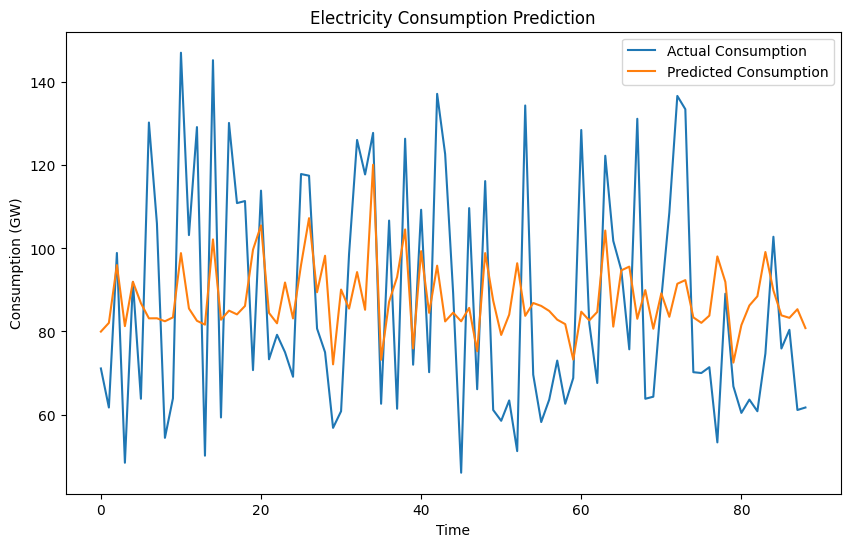

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Consumption', 'Temperature']] = scaler.fit_transform(data[['Consumption', 'Temperature']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


# Predict using the test data
predictions = model.predict(X_test)

# Create a dummy array to hold the predictions for inverse transform
# This is needed because the scaler was fit on a 2D array
predictions_dummy = np.zeros((predictions.shape[0], 2))
predictions_dummy[:,0] = predictions.flatten()  # Put predictions in the first column

# Inverse transform the predictions
predictions_inverse = scaler.inverse_transform(predictions_dummy)

# Extract the actual consumption predictions from the inverse transformed array
predictions = predictions_inverse[:, 0]

# Inverse transform the actual data to get actual values
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to a column vector
y_test_dummy = np.zeros((y_test_reshaped.shape[0], 2))  # Create a dummy array of the correct shape
y_test_dummy[:, 0] = y_test_reshaped.flatten()  # Put the y_test data in the first column
y_test_inverse = scaler.inverse_transform(y_test_dummy)  # Inverse transform
y_test = y_test_inverse[:, 0]  # Extract the actual values

# Plot predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Consumption')
plt.plot(predictions, label='Predicted Consumption')
plt.title('Electricity Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Consumption (GW)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Consumption', 'Temperature']] = scaler.fit_transform(data[['Consumption', 'Temperature']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Ensure that the data types are compatible with TensorFlow
X = X.astype(np.float32)
y = y.astype(np.float32)

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Get the start and end dates from user input
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Create a date range for the prediction period
prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame for the prediction period
prediction_data = pd.DataFrame(index=prediction_dates, columns=['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek'])

# Fill the prediction DataFrame with relevant data
prediction_data['Day'] = prediction_data.index.day
prediction_data['Month'] = prediction_data.index.month
prediction_data['DayOfWeek'] = prediction_data.index.dayofweek
prediction_data['Holiday'] = 0  # Assuming no holidays in the prediction period
prediction_data['Temperature'] = 20  # Assuming a constant temperature of 20 degrees Celsius

# Create sequences for prediction
prediction_seq = []
last_sequence = X_seq[-1]  # Get the last sequence from the training data

for i in range(len(prediction_data)):
    # Update the last sequence with the new data point
    new_sequence = np.append(last_sequence[1:], [prediction_data.iloc[i][['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values], axis=0)
    prediction_seq.append(new_sequence)
    last_sequence = new_sequence

prediction_seq = np.array(prediction_seq)

# Ensure that the prediction sequences are compatible with TensorFlow
prediction_seq = prediction_seq.astype(np.float32)

# Make predictions
predictions = model.predict(prediction_seq)

# Inverse transform the predictions
predictions_dummy = np.zeros((predictions.shape[0], 2))
predictions_dummy[:,0] = predictions.flatten()
predictions_inverse = scaler.inverse_transform(predictions_dummy)
predictions = predictions_inverse[:, 0]

# Create a DataFrame for the predicted values
predicted_data = pd.DataFrame(index=prediction_dates, data=predictions, columns=['Predicted Consumption'])

# Print the predicted values
print(predicted_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2331 - val_loss: 0.1035
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0843 - val_loss: 0.0680
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0651 - val_loss: 0.0666
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0684 - val_loss: 0.0707
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0643 - val_loss: 0.0660
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0587 - val_loss: 0.0666
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0574 - val_loss: 0.0673
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0593 - val_loss: 0.0666
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0604 - val_loss: 0.0674
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0571 - val_loss: 0.0643
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0593 - val_loss: 0.0672
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0534 - val_l

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))
data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']] = scaler_features.fit_transform(data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']])
data['Consumption'] = scaler_target.fit_transform(data[['Consumption']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Get the start and end dates from user input
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Create a date range for the prediction period
prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame for the prediction period
prediction_data = pd.DataFrame(index=prediction_dates, columns=['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek'])

# Fill the prediction DataFrame with relevant data
prediction_data['Day'] = prediction_data.index.day
prediction_data['Month'] = prediction_data.index.month
prediction_data['DayOfWeek'] = prediction_data.index.dayofweek
prediction_data['Holiday'] = 0  # Assuming no holidays in the prediction period
prediction_data['Temperature'] = 20  # Assuming a constant temperature of 20 degrees Celsius
prediction_data['Consumption'] = 0  # Placeholder value for consumption

# Scale the features in the prediction DataFrame
prediction_data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']] = scaler_features.transform(prediction_data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']])

# Create sequences for prediction
prediction_seq = []
last_sequence = X[-sequence_length:]  # Get the last sequence from the original data

for i in range(len(prediction_data)):
    # Update the last sequence with the new data point
    new_sequence = np.append(last_sequence[1:], [prediction_data.iloc[i][['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values], axis=0)
    prediction_seq.append(new_sequence)
    last_sequence = new_sequence

prediction_seq = np.array(prediction_seq)

# Make predictions
predictions = model.predict(prediction_seq)

# Inverse transform the predictions
predictions_inverse = scaler_target.inverse_transform(predictions)

# Create a DataFrame for the predicted values
predicted_data = pd.DataFrame(index=prediction_dates, data=predictions_inverse, columns=['Predicted Consumption'])

# Print the predicted values
print(predicted_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 90ms/step - loss: 0.1997 - val_loss: 0.0747
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0696 - val_loss: 0.0689
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0610 - val_loss: 0.0664
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0480 - val_loss: 0.0666
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0561 - val_loss: 0.0649
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0533 - val_loss: 0.0633
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0509 - val_loss: 0.0604
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0509 - val_loss: 0.0597
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0517 - val_loss: 0.0575
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0449 - val_loss: 0.0544
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0446 - val_loss: 0.0544
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0444 - val_

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0991 - val_loss: 0.0865
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0603 - val_loss: 0.0674
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0597 - val_loss: 0.0727
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0631 - val_loss: 0.0652
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0575 - val_loss: 0.0661
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0510 - val_loss: 0.0613
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0508 - val_loss: 0.0575
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0529 - val_loss: 0.0552
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0550 - val_loss: 0.0629
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0477 - val_loss: 0.0503
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0499 - val_loss: 0.0512
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0448 - val_l

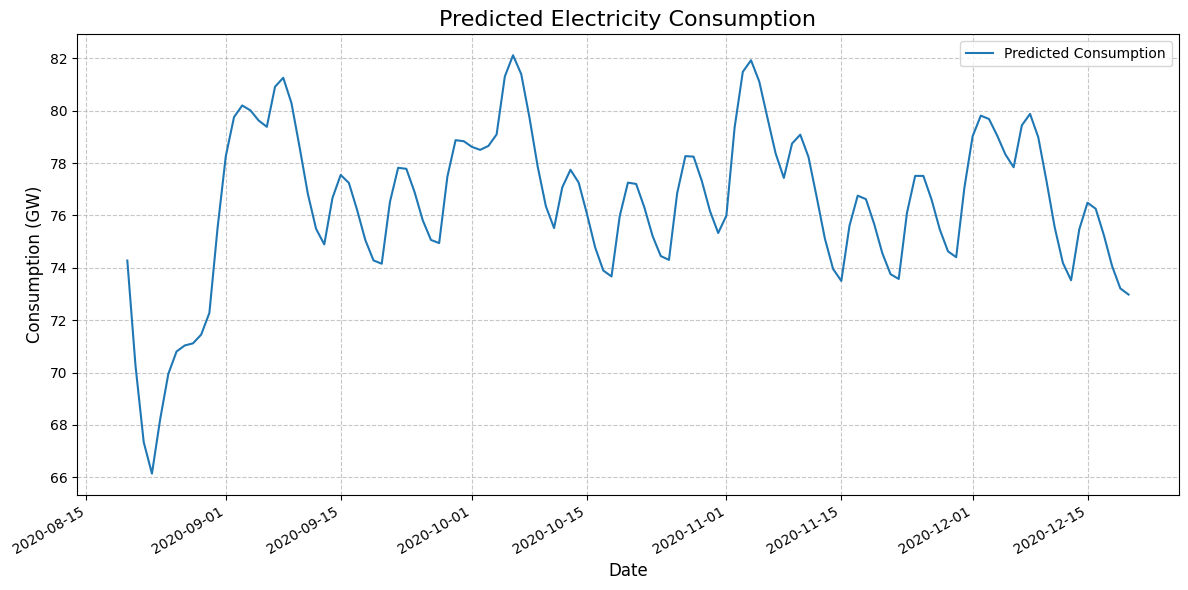

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Sequential = models.Sequential
LSTM = layers.LSTM
Dense = layers.Dense
Dropout = layers.Dropout

# Load the dataset
data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

# Extract relevant features
data['Day'] = data.index.day
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# Normalize the consumption and temperature data
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))
data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']] = scaler_features.fit_transform(data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']])
data['Consumption'] = scaler_target.fit_transform(data[['Consumption']])

# Prepare X (features) and y (target)
X = data[['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values
y = data['Consumption'].values

# Create sequences of data for LSTM
sequence_length = 60
X_seq, y_seq = [], []

for i in range(sequence_length, len(X)):
    X_seq.append(X[i-sequence_length:i])
    y_seq.append(y[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Get the start and end dates from user input
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Create a date range for the prediction period
prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame for the prediction period
prediction_data = pd.DataFrame(index=prediction_dates, columns=['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek'])

# Fill the prediction DataFrame with relevant data
prediction_data['Day'] = prediction_data.index.day
prediction_data['Month'] = prediction_data.index.month
prediction_data['DayOfWeek'] = prediction_data.index.dayofweek
prediction_data['Holiday'] = 0  # Assuming no holidays in the prediction period
prediction_data['Temperature'] = 20  # Assuming a constant temperature of 20 degrees Celsius
prediction_data['Consumption'] = 0  # Placeholder value for consumption

# Scale the features in the prediction DataFrame
prediction_data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']] = scaler_features.transform(prediction_data[['Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']])

# Create sequences for prediction
prediction_seq = []
last_sequence = X[-sequence_length:]  # Get the last sequence from the original data

for i in range(len(prediction_data)):
    # Update the last sequence with the new data point
    new_sequence = np.append(last_sequence[1:], [prediction_data.iloc[i][['Consumption', 'Temperature', 'Holiday', 'Day', 'Month', 'DayOfWeek']].values], axis=0)
    prediction_seq.append(new_sequence)
    last_sequence = new_sequence

prediction_seq = np.array(prediction_seq)

# Make predictions
predictions = model.predict(prediction_seq)

# Inverse transform the predictions
predictions_inverse = scaler_target.inverse_transform(predictions)

# Create a DataFrame for the predicted values
predicted_data = pd.DataFrame(index=prediction_dates, data=predictions_inverse, columns=['Predicted Consumption'])

# Print the predicted values
print(predicted_data)
plt.figure(figsize=(12, 6))
plt.plot(predicted_data.index, predicted_data['Predicted Consumption'], label='Predicted Consumption')

# Customize the plot
plt.title('Predicted Electricity Consumption', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consumption (GW)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use tight layout to ensure all elements fit in the figure
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Classroom/saved models/consumption.hdf5')